#### 字符编码相关

[字符编码](https://www.liaoxuefeng.com/wiki/001374738125095c955c1e6d8bb493182103fac9270762a000/001386819196283586a37629844456ca7e5a7faa9b94ee8000/)

编码的发展：先是ASCII
之后各国制定了自己的编码，中国的GB2312，日本的Shift_JIS等，
Unicode应运而生，把所有的语言统一到一套编码里。Unicode标准中最常用的是用两个字节表示一个字符，如果要用到偏僻的字符，需要四个字节。

接着：如果统一成unicode编码，那么如果写的文本基本上都是英文的话，使用Unicode编码比ASCII编码多一倍的存储空间。然后又出现了吧Unicode编码转化成“可变长编码”的**UTF-8**编码，UTF-8编码把一个unicode字符根据不同的数字大小编码城1-6个字节，常用的英文字母被编码成一个字节，汉子通常是三个字节，只有很生僻的字符才会被编码城4-6个字节。

在计算机内存中，同意使用Unicode编码，当需要保存到硬盘或者需要传输的时候，就转换成UTF-8编码




In [30]:
# 输出使用ASCII编码的二进制形式
print(bin(ord('中')).replace('b',''))

# unicode编码
s = u"中国"


0100111000101101


#### ord()  chr()  hex()  oct()字符和ASCII转换

In [1]:
print(ord('a'))
print(chr(97))

# u后面是十六进制的Unicode吗
# 编码成utf-8格式
print(u'ABC'.encode('utf-8'))
print(u"中文".encode('utf-8'))

print(type(u"中文".encode('utf-8')))

# 解码
# print('\xe4\xb8\xad\xe6\x96\x87'.decode('utf-8'))

# 十六进制
print(hex(18))
print(oct(18))

97
a
b'ABC'
b'\xe4\xb8\xad\xe6\x96\x87'
<class 'bytes'>
0x12
0o22


#### 编码历史

+ ASCII-->只能是英文和拉丁字符，一个字符占用一个字节  
+ gb2312--> 只能6700多个中文，1980年  
+ gbk1.0--> 存了两万多字符，1995  
+ gb18030--> 27000中文  2000年  
+ unicode-->
        UTF-32:一个字符占4个字节  
        UTF-16：一个字符两个字节或者两个以上  
        UTF-8：一个英文用ASCII来存储，中文占3个字节  
    所以如果编码之间转换，就是先将日文转换成中间码Unicode【这个过程叫解码encode】，然后在转换成中文【遍码decode】

在python2里，默认是ASCII编码，使用python2的shell工具来，有点混乱，直接看python3中的编码

[关于编码](http://www.cnblogs.com/alex3714/articles/5717620.html)

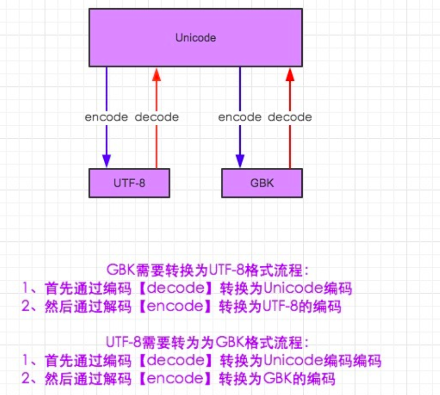

在python3中，文本字符串的默认编码的是unicode，**encode在编码的同时会将数据转换成byte类型。**,便于文件传输.
在decode解码的时候，会把bytes类型转成字符串。

In [1]:
import sys
# 打印的是文件的默认编码utf-8
print(sys.getdefaultencoding())

s = "特斯拉"
s_to_gbk = s.encode('gbk')
print(s)
print(s_to_gbk)

# 如何让bytes可读，再转换成unicode
print(s_to_gbk.decode('gbk'))



utf-8
特斯拉
b'\xcc\xd8\xcb\xb9\xc0\xad'
特斯拉


In [6]:
# 注意这两种不同的输出。第一个将二进制数据输出成了对应的中文
s = '\u4e2d\u6587\u5b57\u7b26'
print(s)

# 保持二进制格式
s = b'\u4e2d\u6587\u5b57\u7b26'
print(s)

中文字符
b'\\u4e2d\\u6587\\u5b57\\u7b26'


上面这种情况是什么原因？print的实现机理是什么？